### Task 1: Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file

In [1]:
# Install ydata-profiling (updated version of pandas-profiling)
!pip install ydata-profiling
!pip install pandas


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2d9d2e7e5e122afc73f4f18e7de51b65fbb91f6db1912e9e2502bf3de1a44075
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
from google.colab import files
uploaded = files.upload()


Saving red_wine.csv to red_wine.csv


### TASK 2:Fit a model using each of the following methods

In [4]:
# Install ydata-profiling (updated version of pandas-profiling)
!pip install ydata-profiling

from ydata_profiling import ProfileReport
import pandas as pd

# Load the red-wine dataset from the uploaded file
red_wine = pd.read_csv('red_wine.csv')  # The file will be in /content by default after upload

# Generate the profiling report
profile = ProfileReport(red_wine, title="Red Wine Data Profiling Report")

# Save and display the report as an HTML file
profile.to_file("red_wine_profile.html")

# Display the profiling report in Colab itself (optional)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
import pandas as pd

# Load dataset
red_wine = pd.read_csv('/content/red_wine.csv')
# Display the first few rows and column names to verify structure
red_wine.head(), red_wine.columns

(   citric acid  sulphates  alcohol  type
 0         0.49       0.63      8.0   low
 1         0.66       0.57      8.3   low
 2         0.23       0.44      8.5  high
 3         0.44       0.84      8.6   low
 4         0.08       0.50      8.7   low,
 Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object'))

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (type) as it is categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(red_wine['type'])  # Encode 'high' and 'low' to 0 and 1
X = red_wine.drop('type', axis=1)  # Features

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear', probability=True),
    "SVM-RBF": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier()
}

# Baseline metrics (predicting the majority class)
baseline_accuracy = max(sum(y == 0), sum(y == 1)) / len(y)
baseline_auc = 0.5  # AUC for a random classifier

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store results
results = {"Model": [], "AUC": [], "Accuracy": []}

# Evaluate each model with 10-fold cross-validation
for model_name, model in models.items():
    # Calculate cross-validated accuracy
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()

    # Calculate cross-validated AUC
    auc = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(roc_auc_score, needs_proba=True)).mean()

    # Store results
    results["Model"].append(model_name)
    results["AUC"].append(auc)
    results["Accuracy"].append(accuracy)

# Add baseline metrics to results
results["Model"].insert(0, "Baseline")
results["AUC"].insert(0, baseline_auc)
results["Accuracy"].insert(0, baseline_accuracy)

# Display the results in a DataFrame
results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_s

,Model,AUC,Accuracy
0,Baseline,0.500000,0.528897
1,Logistic Regression,0.875819,0.784392
2,Naive Bayes,0.893291,0.824773
3,Decision Tree,0.811579,0.801936
4,SVM-Linear,0.875446,0.793134
5,SVM-RBF,0.855024,0.535844
6,Random Forest,0.921410,0.845644


### TASK 3: Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here (10 points)

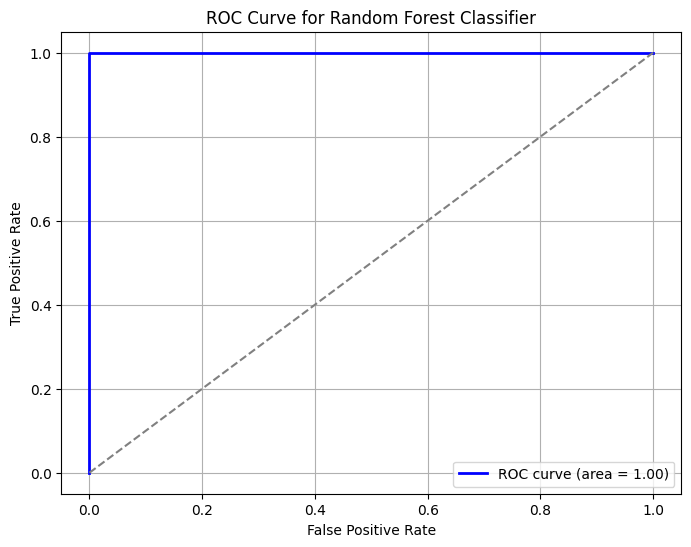

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get predicted probabilities for the positive class
y_proba = rf_model.predict_proba(X)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [19]:
from google.colab import files
uploaded = files.upload()


Saving white_wine.csv to white_wine.csv


### TASK 4: Using the best model obtained above in Q2 (according to AUC), running the model on white-wine.csv, and reporting the AUC score, comment on the performance. (5 points)

In [22]:
import pandas as pd
from sklearn.metrics import roc_auc_score

# Load the white-wine dataset
white_wine = pd.read_csv('/content/white_wine.csv')

# Display the first few rows and column names to verify structure
red_wine.head(), red_wine.columns


(   citric acid  sulphates  alcohol  type
 0         0.49       0.63      8.0   low
 1         0.66       0.57      8.3   low
 2         0.23       0.44      8.5  high
 3         0.44       0.84      8.6   low
 4         0.08       0.50      8.7   low,
 Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object'))

In [23]:

# Prepare features and target variable
y_white = label_encoder.transform(white_wine['type'])  # Encode 'type' as target
X_white = white_wine.drop('type', axis=1)  # Features

# Evaluate the best model (Random Forest) on white-wine dataset
y_white_proba = rf_model.predict_proba(X_white)[:, 1]

# Calculate the AUC score for the white-wine dataset
white_wine_auc = roc_auc_score(y_white, y_white_proba)
print(f"AUC for White Wine Dataset: {white_wine_auc:.4f}")


AUC for White Wine Dataset: 0.9749
